In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

sb.set() # Set default seaborn graphics

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# FUNCTIONS

# Outlier Functions

In [32]:
# To find outliers using quantiles

def find_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

# This function gets the value of the whiskers of a Data Frame when represented in the form of a box plot

def get_whiskers(data_frame):
    q1 = data_frame.quantile(0.25)
    q3 = data_frame.quantile(0.75)
    IQR = q3 - q1
    whisker1 = q1-1.5*IQR
    whisker2 = q3 + 1.5*IQR
    return whisker1,whisker2

# This function removes the outliers in the a DataFrame

def remove_outliers_1(data_frame):
    outlier = False

    for var in data_frame.columns:
        whisker1,whisker2 = get_whiskers(data_frame[var])
        row_num = 0;
        for element in data_frame[var]:
            if element<whisker1 or element>whisker2:
                data_frame.drop(row_num,inplace=True)
                data_frame.reset_index(drop=True , inplace=True)
                row_num-=1
            row_num+=1
        print(len(data_frame))
    return data_frame

# This the updated version of the remove_outliers. It uses std instead of th whiskers in a boxplot
def remove_outliers_2(data_frame):

    for var in data_frame.columns:
        std = data_frame[var].std()
        limit = 3.5*std
        mean = data_frame[var].mean()
        row_num = 0;
        for element in data_frame[var]:
            if element<(mean-limit) or element>(mean+limit):
                data_frame.drop(row_num,inplace=True)
                data_frame.reset_index(drop=True , inplace=True)
                row_num-=1
            row_num+=1
    return data_frame

In [4]:
creditcardData = pd.read_csv('credit-approval_csv.csv')
creditcardData.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,Approved_Status
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+,Approved
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+,Approved
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+,Approved
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+,Approved
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+,Approved


In [5]:
print("Data type : ", type(creditcardData))
print("Data dims : ", creditcardData.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (690, 17)


In [12]:
creditcardData.dtypes

Gender              object
Age                float64
Debt               float64
Married             object
BankCustomer        object
EducationLevel      object
Ethnicity           object
YearsEmployed      float64
PriorDefault        object
Employed            object
CreditScore          int64
DriversLicense      object
Citizen             object
ZipCode            float64
Income               int64
Approved            object
Approved_Status     object
dtype: object

In [11]:
creditcardData.describe()

,Age,Debt,YearsEmployed,CreditScore,ZipCode,Income
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [13]:
creditcardDataInt = creditcardData.loc[:, creditcardData.dtypes == np.int64]
creditcardDataInt.describe()

,CreditScore,Income
count,690.00000,690.000000
mean,2.40000,1017.385507
std,4.86294,5210.102598
min,0.00000,0.000000
25%,0.00000,0.000000
50%,0.00000,5.000000
75%,3.00000,395.500000
max,67.00000,100000.000000


In [23]:
creditcardDataFlt = creditcardData.loc[:, creditcardData.dtypes == np.float64]
creditcardDataFlt.drop('ZipCode',inplace = True, axis=1)
creditcardDataFlt.describe()

C:\Users\William\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Age,Debt,YearsEmployed
count,678.000000,690.000000,690.000000
mean,31.568171,4.758725,2.223406
std,11.957862,4.978163,3.346513
min,13.750000,0.000000,0.000000
25%,22.602500,1.000000,0.165000
50%,28.460000,2.750000,1.000000
75%,38.230000,7.207500,2.625000
max,80.250000,28.000000,28.500000


In [15]:
creditcardDataStr = creditcardData.loc[:, creditcardData.dtypes == object]
creditcardDataStr.describe()

,Gender,Married,BankCustomer,EducationLevel,Ethnicity,PriorDefault,Employed,DriversLicense,Citizen,Approved,Approved_Status
count,678,684,684,681,681,690,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2,2
top,b,u,g,c,v,t,f,f,g,-,Not Approved
freq,468,519,519,137,399,361,395,374,625,383,383


In [44]:
for var in creditcardDataStr:
    print(f'{var} categories :{creditcardDataStr[var].unique()}')
    

Gender categories :['b' 'a' nan]
Married categories :['u' 'y' nan 'l']
BankCustomer categories :['g' 'p' nan 'gg']
EducationLevel categories :['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j' nan]
Ethnicity categories :['v' 'h' 'bb' 'ff' 'j' 'z' nan 'o' 'dd' 'n']
PriorDefault categories :['t' 'f']
Employed categories :['t' 'f']
DriversLicense categories :['f' 't']
Citizen categories :['g' 's' 'p']
Approved categories :['+' '-']
Approved_Status categories :['Approved' 'Not Approved']


In [45]:
for var in creditcardDataStr:
    print(f'{var} categories :{len(creditcardDataStr[var].unique())}')
    

Gender categories :3
Married categories :4
BankCustomer categories :4
EducationLevel categories :15
Ethnicity categories :10
PriorDefault categories :2
Employed categories :2
DriversLicense categories :2
Citizen categories :3
Approved categories :2
Approved_Status categories :2


In [46]:
for var in creditcardDataStr:
    print(f'{var}: {creditcardDataStr[var].value_counts()}')

Gender: b    468
a    210
Name: Gender, dtype: int64
Married: u    519
y    163
l      2
Name: Married, dtype: int64
BankCustomer: g     519
p     163
gg      2
Name: BankCustomer, dtype: int64
EducationLevel: c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
r       3
Name: EducationLevel, dtype: int64
Ethnicity: v     399
h     138
bb     59
ff     57
j       8
z       8
dd      6
n       4
o       2
Name: Ethnicity, dtype: int64
PriorDefault: t    361
f    329
Name: PriorDefault, dtype: int64
Employed: f    395
t    295
Name: Employed, dtype: int64
DriversLicense: f    374
t    316
Name: DriversLicense, dtype: int64
Citizen: g    625
s     57
p      8
Name: Citizen, dtype: int64
Approved: -    383
+    307
Name: Approved, dtype: int64
Approved_Status: Not Approved    383
Approved        307
Name: Approved_Status, dtype: int64


# Finding the number of outliers for the Integer and Float Data

In [31]:
outliers = find_outliers(creditcardData['Age'])
print(f'Number of outliers of Age: {len(outliers)}')

outliers = find_outliers(creditcardData['Debt'])
print(f'Number of outliers of Debt: {len(outliers)}')

outliers = find_outliers(creditcardData['YearsEmployed'])
print(f'Number of outliers of YearsEmployed: {len(outliers)}')

outliers = find_outliers(creditcardData['CreditScore'])
print(f'Number of outliers of CreditScore: {len(outliers)}')

outliers = find_outliers(creditcardData['Income'])
print(f'Number of outliers of Income: {len(outliers)}')

Number of outliers of Age: 16
Number of outliers of Debt: 17
Number of outliers of YearsEmployed: 63
Number of outliers of CreditScore: 79
Number of outliers of Income: 113


# Finding the skewness for the Integer and Float Data

In [35]:
for var in creditcardDataInt:
    print(f'skewness for {var}: {creditcardData[var].skew().round(2)}')
for var in creditcardDataFlt:
    print(f'skewness for {var}: {creditcardData[var].skew().round(2)}')

skewness for CreditScore: 5.15
skewness for Income: 13.14
skewness for Age: 1.15
skewness for Debt: 1.49
skewness for YearsEmployed: 2.89


In [52]:
credit_score = pd.DataFrame(creditcardData['CreditScore']) # Predictor
approved_status = pd.DataFrame(creditcardData['Approved_Status']) # Response

In [53]:
x_train , x_test , y_train , y_test = train_test_split(credit_score,approved_status,test_size = 0.20)

In [54]:
print("Train Set :", x_train.shape, y_train.shape)
print("Test Set  :", x_test.shape, y_test.shape)

Train Set : (552, 1) (552, 1)
Test Set  : (138, 1) (138, 1)


In [55]:
y_train.value_counts()

Approved_Status
Not Approved       310
Approved           242
dtype: int64

In [56]:
x_train.describe()

,CreditScore
count,552.000000
mean,2.353261
std,5.041770
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,67.000000


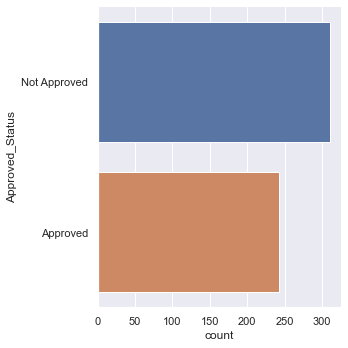

In [59]:
# Count Plot for Approval Status Train
sb.catplot(y = "Approved_Status", data = y_train, kind = "count")

<AxesSubplot:>

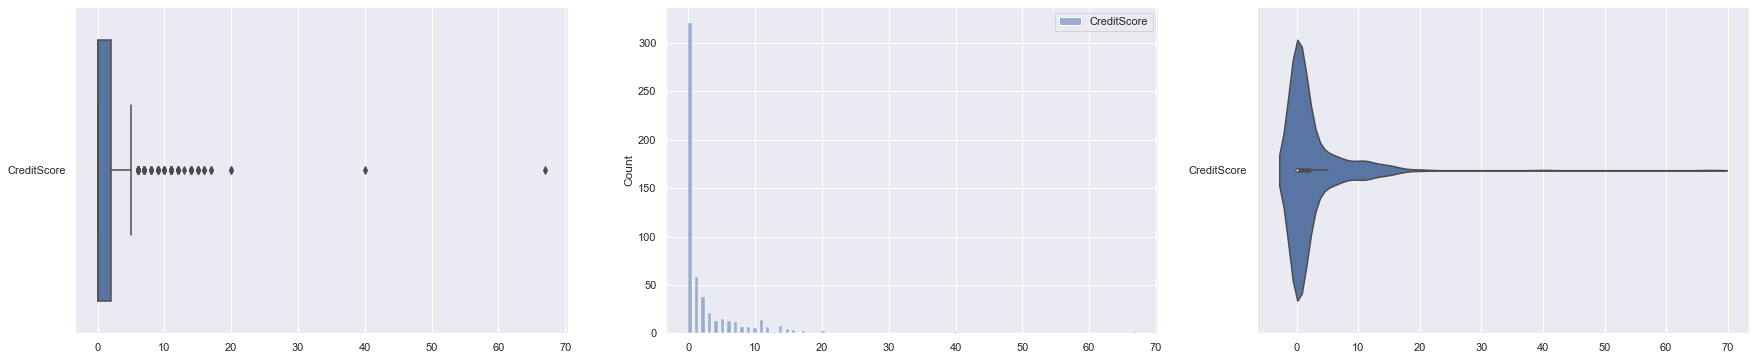

In [60]:
# Plot the distributions of SalePrice Train
f, axes = plt.subplots(1, 3, figsize=(30, 6))
sb.boxplot(data = x_train, orient = "h", ax = axes[0])
sb.histplot(data = x_train, ax = axes[1])
sb.violinplot(data = x_train, orient = "h", ax = axes[2])

<AxesSubplot:xlabel='CreditScore', ylabel='Approved_Status'>

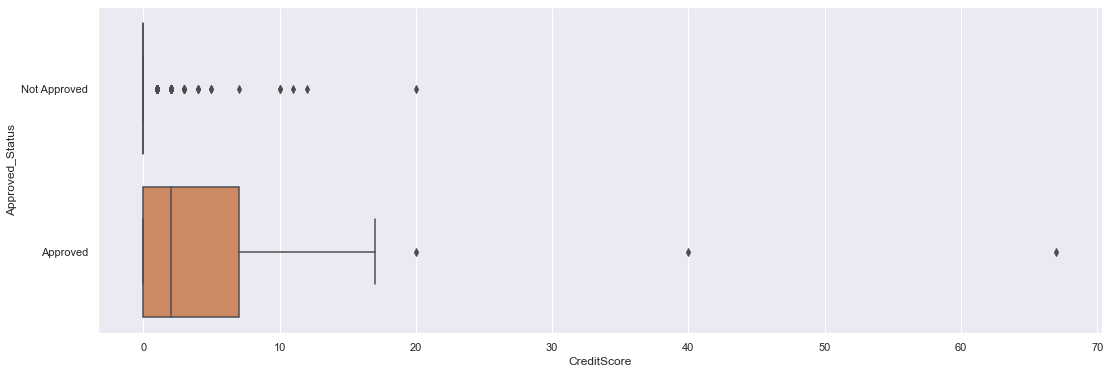

In [66]:
# Create a joint dataframe by concatenating Total and Legendary
trainDF = pd.concat([x_train, y_train], axis = 1).reindex(x_train.index)

# Joint Boxplot of Total Train against Legendary Train
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "CreditScore", y = "Approved_Status", data = trainDF, orient = "h")

C:\Users\William\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 71.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\William\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 24.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='CreditScore', ylabel='Approved_Status'>

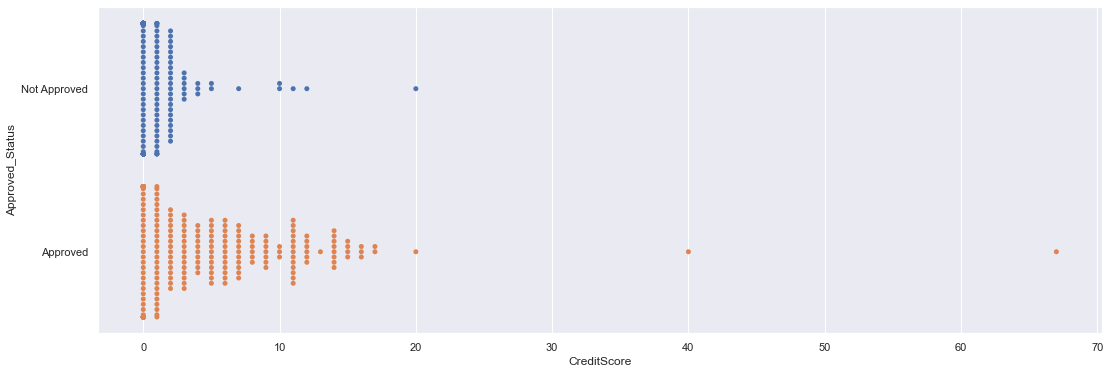

In [69]:
# Joint Swarmplot of Total Train against Legendary Train
trainDF = pd.concat([x_train, y_train], axis = 1).reindex(x_train.index)

f = plt.figure(figsize=(18, 6))
sb.swarmplot(x = "CreditScore", y = "Approved_Status", data = trainDF, orient = "h")

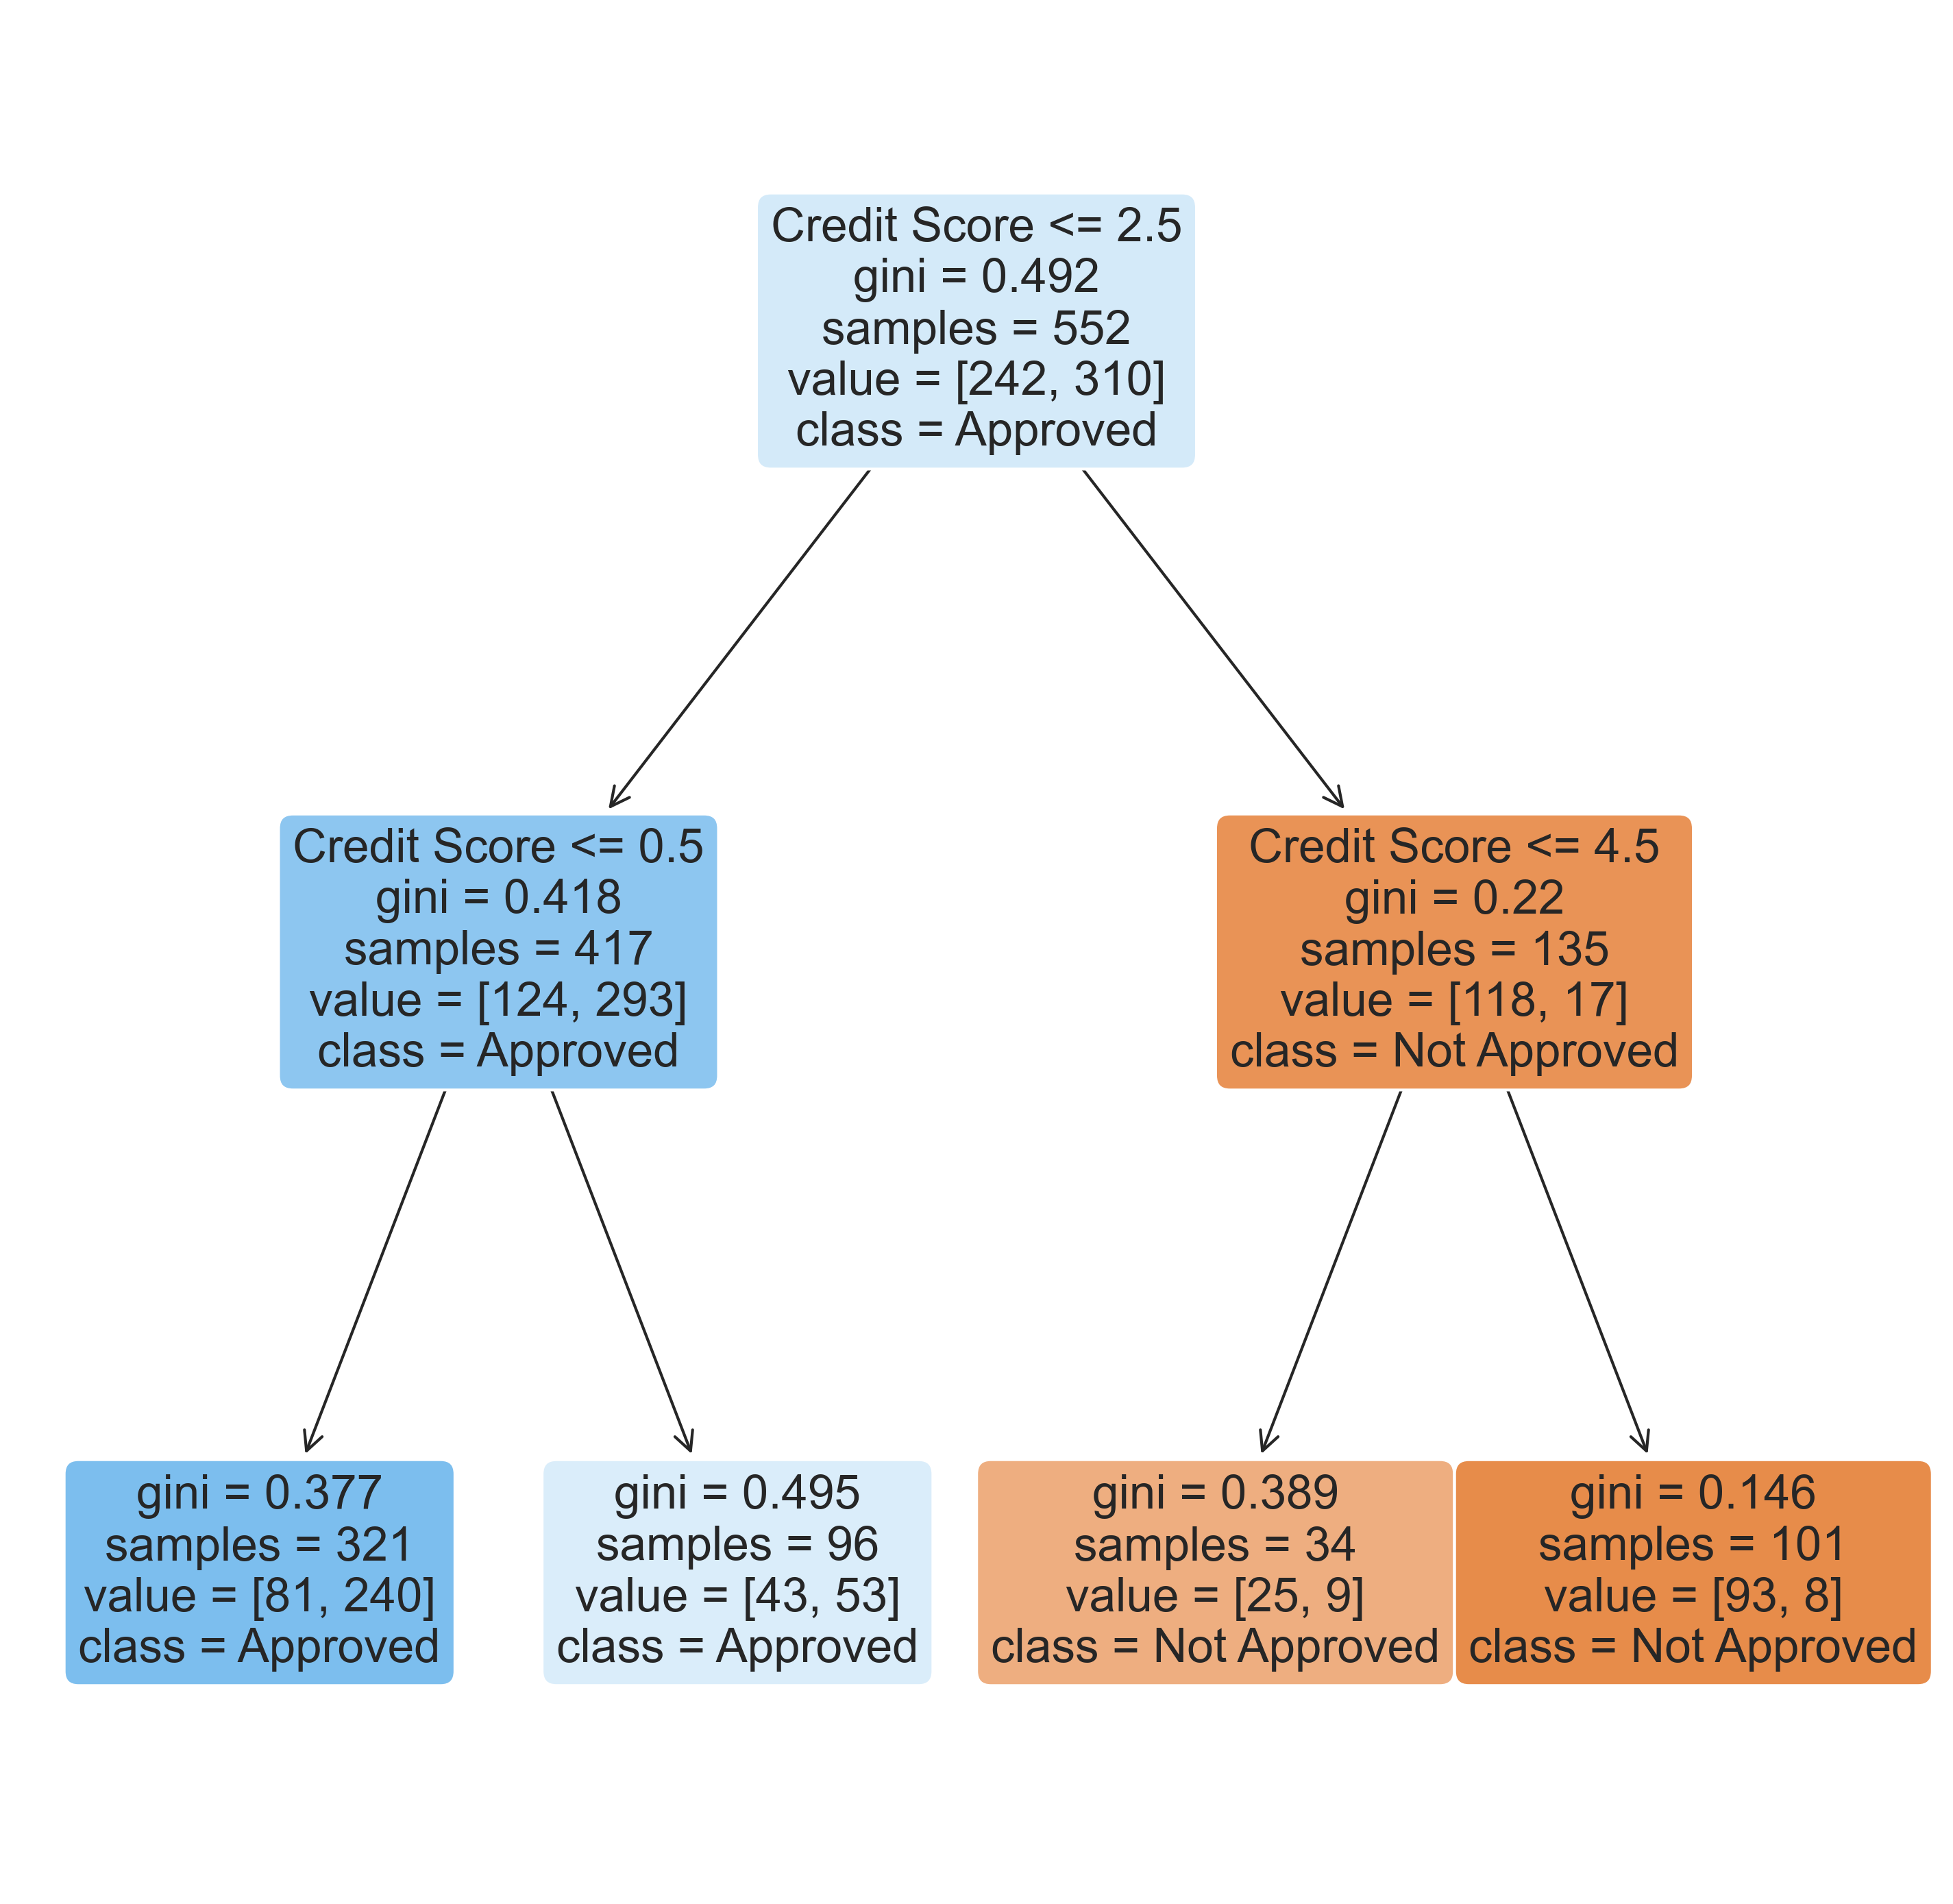

In [72]:
# Create a Decision Tree Classifier object
dectree1 = DecisionTreeClassifier(max_depth = 2)

# Train the Decision Tree Classifier model
dectree1.fit(x_train, y_train)

# Plot the trained Decision Tree
f = plt.figure(figsize=(12,12),dpi = 300)
plot_tree(dectree1, filled=True, rounded=True, 
          feature_names=["Credit Score"],
          class_names = ['Not Approved','Approved'])
plt.show()

In [ ]:
seaborn.catplot(data = creditcardDataStr , y='' , kind = 'count' , height = 20)

NameError: name 'x_train' is not defined